In [ ]:
#Instalação de bibliotecas necessárias

!pip install pycaret

In [ ]:
#transformação de dados de csv para DataFrame

import pandas as pd

data = []
for i in range(1, 6):
    df = pd.read_csv(f'/content/teste_mesa{i}.csv')
    df['local'] = i
    data.append(df)

merged_data = pd.concat(data, ignore_index=True)

merged_data

,Geral,local
0,:Inteli-COLLEGE-38FC:5C:45:00:5F:D8SHOW:Inteli...,1
1,:Inteli-COLLEGE-44FC:5C:45:00:5F:D8SHOW:Inteli...,1
2,:Inteli-COLLEGE-45FC:5C:45:00:5F:D8SHOW:Inteli...,1
3,:Inteli-COLLEGE-44FC:5C:45:00:5F:D8SHOW:Inteli...,1
4,:Inteli-COLLEGE-44FC:5C:45:00:5F:D8SHOW:Inteli...,1
...,...,...
525,:DIRECT-1CJ95EBB404C9GOi_-4952:57:9C:C0:46:1CS...,5
526,:DIRECT-1CJ95EBB404C9GOi_-4952:57:9C:C0:46:1CS...,5
527,:DIRECT-1CJ95EBB404C9GOi_-5252:57:9C:C0:46:1CS...,5
528,:DIRECT-1CJ95EBB404C9GOi_-5152:57:9C:C0:46:1CS...,5


In [ ]:
#Formatação adequada da string recebida no serial do esp32

df = pd.DataFrame()

stringDividida = merged_data.iloc[0]['Geral'].split("SHOW")
for stringSingle in stringDividida:
  for stringSingleInside in stringSingle.split("-"):
    try:
      if isinstance(int(stringSingleInside[0:2]), int):
          df.at[0 ,f'{stringSingleInside[2:]}'] = stringSingleInside[0:2]
    except ValueError:
        pass

for line in range(1, len(merged_data)):
  df_append = pd.DataFrame()

  stringDividida = merged_data.iloc[line]['Geral'].split("SHOW")
  for stringSingle in stringDividida:
    for stringSingleInside in stringSingle.split("-"):
      try:
        if isinstance(int(stringSingleInside[0:2]), int):
          if stringSingleInside[2:] in list(df.columns):
            df_append.at[0 ,f'{stringSingleInside[2:]}'] = stringSingleInside[0:2]
      except ValueError:
          pass

  df = pd.concat([df, df_append], ignore_index=True)
  df = df.fillna(0)

df['local'] = merged_data['local']
df

,FC:5C:45:00:5F:D8,FC:5C:45:C0:5F:D8,FC:5C:45:C0:5F:D9,52:57:9C:C0:46:1C,FC:5C:45:00:68:68,FC:5C:45:C0:68:68,FC:5C:45:C0:68:69,FC:5C:45:00:55:18,FC:5C:45:C0:55:18,FC:5C:45:00:55:1A,...,FC:5C:45:80:5C:F8,FC:5C:45:00:5C:FA,FC:5C:45:C0:5F:B9,FC:5C:45:C0:53:98,FC:5C:45:C0:53:99,FC:5C:45:00:5F:B8,74:4C:A1:5A:B3:31,3A:1A:52:EA:A3:FC,DE:03:98:3A:41:69,local
0,38,39,39,57,67,67,67,71,71,71,...,86,86,90,90,90,91,92,92,92,1
1,44,44,44,47,70,71,70,72,71,71,...,0,0,88,84,84,87,0,0,0,1
2,45,45,46,48,73,73,73,72,73,73,...,0,0,88,88,88,88,0,0,0,1
3,44,44,45,48,72,73,73,71,71,71,...,0,0,87,85,86,87,0,0,0,1
4,44,44,44,49,71,72,72,70,70,71,...,89,0,89,85,85,88,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
525,52,53,52,49,71,71,71,74,75,75,...,88,86,87,78,77,0,91,0,0,5
526,53,54,53,49,69,69,69,75,75,75,...,88,88,86,80,80,87,93,0,0,5
527,52,52,52,52,68,68,68,75,75,75,...,85,86,88,78,79,87,92,0,0,5
528,55,55,55,51,66,66,66,76,77,78,...,86,87,88,79,78,87,0,0,0,5


In [ ]:
# Comparação de modelos de classificação

from pycaret.classification import *
s = setup(df , target = 'local', session_id = 123)
best = compare_models()

,Description,Value
0,Session id,123
1,Target,local
2,Target type,Multiclass
3,Target mapping,"1: 0, 2: 1, 3: 2, 4: 3, 5: 4"
4,Original data shape,"(530, 40)"
5,Transformed data shape,"(530, 610)"
6,Transformed train set shape,"(371, 610)"
7,Transformed test set shape,"(159, 610)"
8,Categorical features,39
9,Preprocess,True


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
svm,SVM - Linear Kernel,0.9757,0.0000,0.9757,0.9790,0.9755,0.9695,0.9705,0.9380
rf,Random Forest Classifier,0.9730,0.9962,0.9730,0.9760,0.9728,0.9662,0.9670,0.9090
lr,Logistic Regression,0.9703,0.9985,0.9703,0.9736,0.9703,0.9628,0.9636,1.3220
et,Extra Trees Classifier,0.9676,0.9977,0.9676,0.9722,0.9677,0.9594,0.9605,1.0130
knn,K Neighbors Classifier,0.9649,0.9894,0.9649,0.9675,0.9645,0.9561,0.9569,0.5430
nb,Naive Bayes,0.9649,0.9778,0.9649,0.9697,0.9648,0.9560,0.9573,0.8060
ridge,Ridge Classifier,0.9568,0.0000,0.9568,0.9611,0.9569,0.9459,0.9470,0.4440
lightgbm,Light Gradient Boosting Machine,0.9568,0.9952,0.9568,0.9623,0.9571,0.9459,0.9471,0.9030
gbc,Gradient Boosting Classifier,0.9542,0.9935,0.9542,0.9609,0.9546,0.9427,0.9441,1.6400
xgboost,Extreme Gradient Boosting,0.9542,0.9924,0.9542,0.9612,0.9546,0.9427,0.9442,0.5660


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

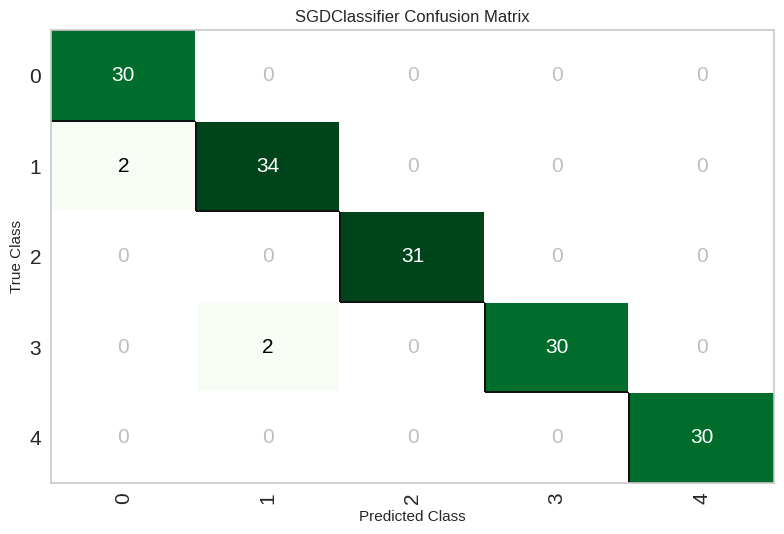

In [ ]:
#Matriz de confusão do modelo

plot_model(best, plot = 'confusion_matrix')

#Rede Neural

Além da criação e comparação dos modelos de machine learning também criamos uma rede convolucional treinada apartir dos dados recebidos do esp32

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv1D, MaxPooling1D, Flatten
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(df.drop('local', axis=1), df['local'], test_size=0.1)

x_train = np.array(x_train)
x_test = np.array(x_test)

x_train = np.expand_dims(x_train, axis=-1)
x_test = np.expand_dims(x_test, axis=-1)

model = Sequential()
model.add(Conv1D(32, kernel_size=3, activation='relu', input_shape=(x_train.shape[1], 1)))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(6, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

x_train = np.asarray(x_train).astype(np.float32)
y_train = np.asarray(y_train).astype(np.float32)
x_test = np.asarray(x_test).astype(np.float32)
y_test = np.asarray(y_test).astype(np.float32)

model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=10, batch_size=16)

loss, accuracy = model.evaluate(x_test, y_test)
print(f'Teste de perda: {loss:.4f}')
print(f'Teste de precisão: {accuracy:.4f}')

Epoch 1/10
30/30 [==============================] - 2s 12ms/step - loss: 2.7220 - accuracy: 0.7631 - val_loss: 0.0412 - val_accuracy: 0.9811
Epoch 2/10
30/30 [==============================] - 0s 5ms/step - loss: 0.4535 - accuracy: 0.9350 - val_loss: 0.0797 - val_accuracy: 0.9623
Epoch 3/10
30/30 [==============================] - 0s 4ms/step - loss: 0.3024 - accuracy: 0.9455 - val_loss: 0.0578 - val_accuracy: 0.9811
Epoch 4/10
30/30 [==============================] - 0s 4ms/step - loss: 0.3358 - accuracy: 0.9371 - val_loss: 0.0438 - val_accuracy: 0.9811
Epoch 5/10
30/30 [==============================] - 0s 4ms/step - loss: 0.1853 - accuracy: 0.9560 - val_loss: 0.2128 - val_accuracy: 0.9434
Epoch 6/10
30/30 [==============================] - 0s 4ms/step - loss: 0.2018 - accuracy: 0.9602 - val_loss: 0.0203 - val_accuracy: 1.0000
Epoch 7/10
30/30 [==============================] - 0s 4ms/step - loss: 0.1076 - accuracy: 0.9769 - val_loss: 0.0362 - val_accuracy: 0.9811
Epoch 8/10
30/30 [=